In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in data
Xtest=pd.read_csv("X_test.csv")
Xtrain=pd.read_csv("X_train.csv")
ytest=pd.read_csv("y_test.csv")
ytrain=pd.read_csv("y_train.csv")
Xtest.head()

,0.0,1.0,1.0.1,0.0.1,1.0.2,1.0.3,1.0.4,1.0.5,1.0.6,1.0.7,...,0.0.948,0.0.949,0.0.950,0.0.951,0.0.952,0.0.953,0.0.954,0.0.955,0.0.956,0.0.957
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#change data to array
X_train = Xtrain.values
X_test = Xtest.values
y_train = ytrain.values
y_test = ytest.values

In [4]:
X_train.shape

(24999, 1000)

In [5]:
X_test.shape

(24999, 1000)

In [6]:
# K-fold CV for Logistic Regression
scores = [] #store the accuracy scores
LR = LogisticRegression() #set the model type
cv = KFold(n_splits=4, random_state=42, shuffle=False) #set the CV parameters
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    LR.fit(X_train_fold, y_train_fold)
    scores.append(LR.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", LR.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", LR.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8839404768254306
  - Testing score =  0.85552
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8826070723771935
  - Testing score =  0.85504
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8846871833164436
  - Testing score =  0.85232
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.8834133333333334
  - Testing score =  0.8617378780604896


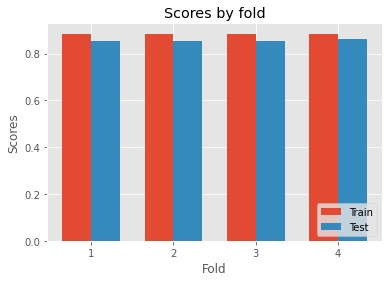

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

N = 4
train_scores = (0.8839404768254306,0.8826070723771935,0.8846871833164436,0.8834133333333334)
test_scores = (0.85552, 0.85504, 0.85232,0.8617378780604896)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, train_scores, width, label='Train')
plt.bar(ind + width, test_scores, width,
    label='Test')

plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Scores by fold')

plt.xticks(ind + width / 2, ('1', '2', '3', '4'))
plt.legend(loc=4)
plt.show()

In [8]:
# Print average testing score over all CV folds
print(np.mean(scores))

0.8561544695151224


In [9]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Find best parameters using grid search
from sklearn.model_selection import GridSearchCV
C_vals = np.logspace(0,4,10)
params = dict(C=C_vals)

lrgrid = GridSearchCV(LR, param_grid=params, n_jobs=-1, cv=4, verbose=5)
lrgrid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%lrgrid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%lrgrid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%lrgrid.best_score_)
print('Best Parameters : ',lrgrid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:   35.1s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:   36.5s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:   44.6s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.7s finished


Train Accuracy : 0.882
Test Accuracy : 0.859
Best Accuracy Through Grid Search : 0.855
Best Parameters :  {'C': 7.742636826811269}


In [11]:
print(C_vals)

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


In [12]:
lrgrid.best_estimator_.coef_[0]

array([ 0.00000000e+00,  9.90547145e-02,  2.56398877e-01,  0.00000000e+00,
       -3.88081101e-02,  7.27577943e-02, -2.10325500e-01, -1.33001951e-01,
       -1.56839120e-01,  1.33804157e-01, -1.84977749e-01, -2.51841489e-02,
        1.38600444e-01,  1.11371634e-01, -1.61197932e-01, -4.47170272e-02,
       -2.01750565e-01, -5.76801833e-04, -5.75052613e-03,  5.72126456e-02,
       -1.26186532e-01, -4.19991341e-02,  7.36441045e-02, -3.54176922e-02,
       -2.05623030e-01,  2.72353860e-01,  1.30075492e-03,  1.98639785e-02,
       -6.72434679e-02, -4.84218870e-02, -2.41605101e-02, -2.39144550e-02,
       -3.12321947e-03, -5.87207420e-02, -9.80558973e-02, -4.78148362e-02,
       -7.15476938e-02,  6.81962148e-02, -8.21756619e-02, -1.27335321e-02,
       -3.65920187e-02, -2.86243078e-02, -8.61850149e-02, -2.33886312e-01,
        7.81663152e-02,  1.52079166e-01, -4.08476990e-03,  1.31391883e-01,
       -1.21482469e-01, -4.07423475e-02, -9.66026534e-02,  6.16024430e-02,
        1.78426678e-01,  

No handles with labels found to put in legend.


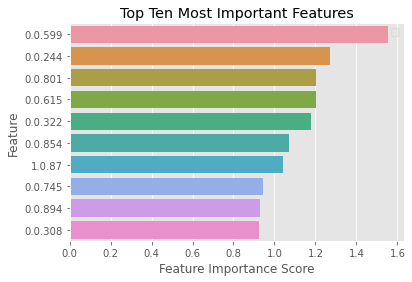

In [13]:
#find most important features
feature_importances_ls = pd.DataFrame(lrgrid.best_estimator_.coef_[0],
                                   index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
ls_feature_imp = pd.Series(lrgrid.best_estimator_.coef_[0],Xtrain.columns).sort_values(ascending=False)
ls_feature_imp
#plot top 10 most important features
sns.barplot(x=ls_feature_imp[0:10], y=ls_feature_imp.index[0:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Top Ten Most Important Features")
plt.legend()
plt.show()

In [14]:
# K-fold CV for Naive Bayes
scores = []
NB = BernoulliNB()
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    NB.fit(X_train_fold, y_train_fold)
    scores.append(NB.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", NB.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", NB.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8171102458797802
  - Testing score =  0.80464
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8212704677582804
  - Testing score =  0.81952
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8138567390260814
  - Testing score =  0.8024
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.8232533333333333
  - Testing score =  0.8278124499919988


In [15]:
# Print average testing score over all CV folds
print(np.mean(scores))

0.8135931124979998


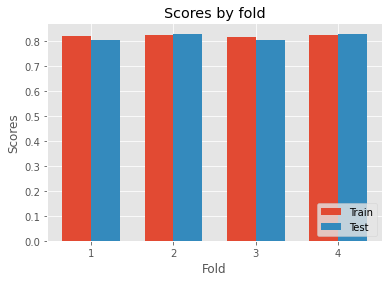

In [16]:
N = 4
train_scores = (0.8171102458797802,0.8212704677582804,0.8138567390260814,0.8232533333333333)
test_scores = (0.80464,0.82688,0.8024,0.8278124499919988)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, train_scores, width, label='Train')
plt.bar(ind + width, test_scores, width,
    label='Test')

plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Scores by fold')

plt.xticks(ind + width / 2, ('1', '2', '3', '4'))
plt.legend(loc=4)
plt.show()

In [17]:
NB.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [18]:
#find best alpha (smoothing) parameter
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=4, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    1.4s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


Train Accuracy : 0.818
Test Accuracy : 0.815
Best Accuracy Through Grid Search : 0.813
Best Parameters :  {'alpha': 0.01}


In [19]:
# K-fold CV for random forest
scores = []
forest = RandomForestClassifier (n_estimators=100, random_state=0)
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    forest.fit(X_train_fold, y_train_fold)
    scores.append(forest.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", forest.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", forest.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  1.0
  - Testing score =  0.81584
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  1.0
  - Testing score =  0.82224
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  1.0
  - Testing score =  0.81504
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  1.0
  - Testing score =  0.8222115538486158


In [20]:
# Print average testing score over all CV folds
print(np.mean(scores))

0.818832888462154


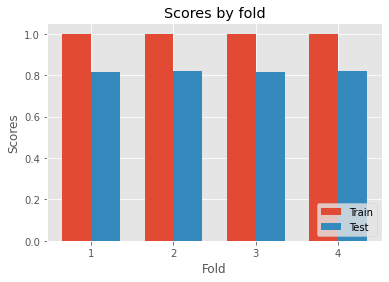

In [21]:
N = 4
train_scores = (1,1,1,1)
test_scores = (0.81584,0.82224,0.81504,0.8222115538486158)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, train_scores, width, label='Train')
plt.bar(ind + width, test_scores, width,
    label='Test')

plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Scores by fold')

plt.xticks(ind + width / 2, ('1', '2', '3', '4'))
plt.legend(loc=4)
plt.show()

In [22]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [23]:
#find best number of trees and depth
params = {'n_estimators': [10,50,100,200],
          'max_depth': [5,10,20,50,75,100]
         }

forest_grid = GridSearchCV(forest, param_grid=params, n_jobs=-1, cv=4, verbose=5)
forest_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%forest_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%forest_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%forest_grid.best_score_)
print('Best Parameters : ',forest_grid.best_params_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  85 out of  96 | elapsed:  1.9min remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.1min finished


Train Accuracy : 1.000
Test Accuracy : 0.832
Best Accuracy Through Grid Search : 0.828
Best Parameters :  {'max_depth': 100, 'n_estimators': 200}


(0.0, 0.015)

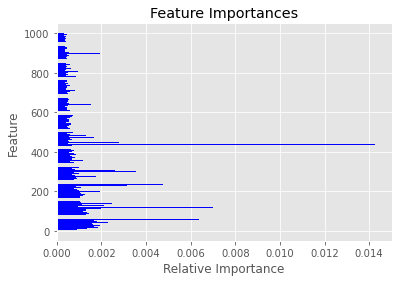

In [24]:
#find which features are most important
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.xlim([0, 0.015])

In [25]:
feature_imp = pd.Series(forest_grid.best_estimator_.feature_importances_,Xtrain.columns).sort_values(ascending=False)
feature_imp

0.0.37     0.025842
0.0.178    0.023153
1.0.42     0.015388
0.0.354    0.014474
0.0.295    0.012931
             ...   
0.0.389    0.000263
1.0.1      0.000012
0.0.1      0.000000
1.0        0.000000
0.0        0.000000
Length: 1000, dtype: float64

In [26]:
# K-fold CV for Gradient Boosted Trees
scores = []
gbt = GradientBoostingClassifier(random_state=0)
cv = KFold(n_splits=4, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    gbt.fit(X_train_fold, y_train_fold)
    scores.append(gbt.score(X_test_fold, y_test_fold))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train_fold.shape)
    print("  - Test partition shape: ", X_test_fold.shape)
    print("  - Training score = ", gbt.score(X_train_fold, y_train_fold))
    print("  - Testing score = ", gbt.score(X_test_fold, y_test_fold))
    
    i += 1

Processing Fold # 1
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8253240172809216
  - Testing score =  0.8088
Processing Fold # 2
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8303376180062937
  - Testing score =  0.81088
Processing Fold # 3
  - Train partition shape:  (18749, 1000)
  - Test partition shape:  (6250, 1000)
  - Training score =  0.8282041708891141
  - Testing score =  0.80768
Processing Fold # 4
  - Train partition shape:  (18750, 1000)
  - Test partition shape:  (6249, 1000)
  - Training score =  0.82768
  - Testing score =  0.814210273643783


In [27]:
# Print average testing score over all CV folds
print(np.mean(scores))

0.8103925684109458


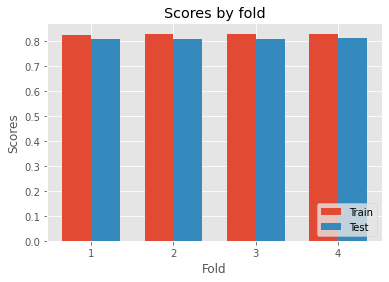

In [28]:
N = 4
train_scores = (0.8253240172809216,0.8303376180062937,0.8282041708891141,0.82768)
test_scores = (0.8088,0.81088,0.80768,0.814210273643783)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, train_scores, width, label='Train')
plt.bar(ind + width, test_scores, width,
    label='Test')

plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Scores by fold')

plt.xticks(ind + width / 2, ('1', '2', '3', '4'))
plt.legend(loc=4)
plt.show()

In [29]:
gbt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
#find best number of trees and best learning rate
params = {'n_estimators': [10,50,100],
          'learning_rate':[0.1, 0.2,0.3]
         }

gbt_grid = GridSearchCV(gbt, param_grid=params, n_jobs=-1, cv=4, verbose=5)
gbt_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%gbt_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%gbt_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gbt_grid.best_score_)
print('Best Parameters : ',gbt_grid.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  36 | elapsed:  2.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:  4.1min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  4.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.1min finished


Train Accuracy : 0.870
Test Accuracy : 0.844
Best Accuracy Through Grid Search : 0.838
Best Parameters :  {'learning_rate': 0.3, 'n_estimators': 100}


(0.0, 0.06)

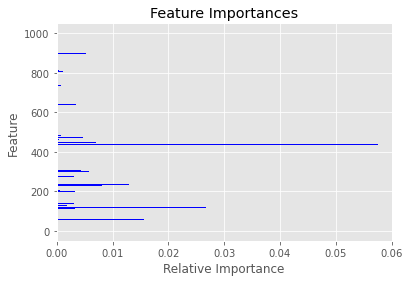

In [31]:
#find which features are most important
importances = gbt.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances, color='b', align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.xlim([0, 0.06])

In [32]:
feature_imp = pd.Series(gbt_grid.best_estimator_.feature_importances_,Xtrain.columns).sort_values(ascending=False)
feature_imp

0.0.37     0.108954
0.0.178    0.078462
1.0.42     0.047410
0.0.354    0.046359
0.0.295    0.034434
             ...   
0.0.527    0.000000
0.0.523    0.000000
0.0.522    0.000000
0.0.521    0.000000
0.0        0.000000
Length: 1000, dtype: float64